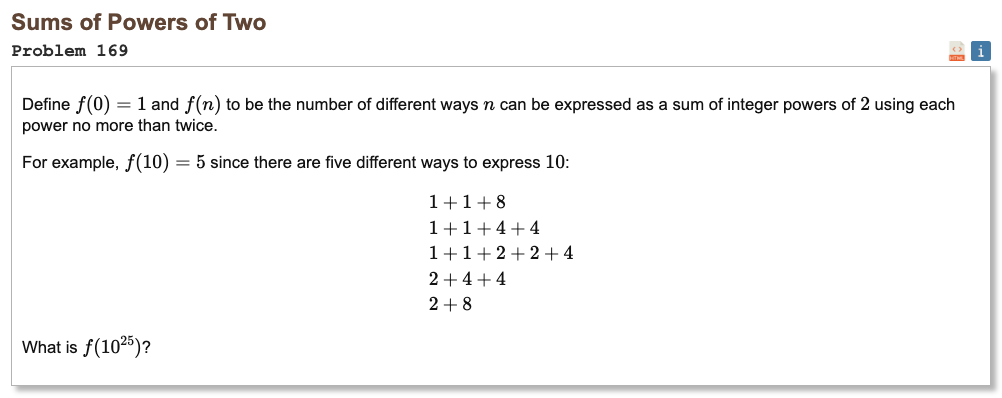

## Initial approach

* we want the number of ways to write n as a sum of powers of two where each power is used at most twice
* think in base two with digits allowed 0, 1, 2 and allow carries while matching the binary of n
* scan bits from least significant to most significant and keep only two carry states, 0 or 1
* for each bit, count choices of digit a in {0,1,2}
* that make a plus carry match the target bit and update the next carry
* when the target bit is 0, from carry 0 you can pick a 0 or 2, from carry 1 only a 1 works
* when the target bit is 1, from carry 0 only a 1 works, from carry 1 you can pick a 0 or 2
* the answer is the number of ways that finish with carry 0 after processing all bits
* no external libraries are needed

In [1]:
def count_ways_with_twos_limit(n):
    if n == 0:
        return 1
    bits = []
    x = n
    while x > 0:
        bits.append(x & 1)
        x >>= 1
    dp0, dp1 = 1, 0
    for bit in bits:
        if bit == 0:
            ndp0 = dp0
            ndp1 = dp0 + dp1
        else:
            ndp0 = dp0 + dp1
            ndp1 = dp1
        dp0, dp1 = ndp0, ndp1
    return dp0

result = count_ways_with_twos_limit(10**25)
print("Result:", result)

Result: 178653872807
